# 噪声变化的准确率


随着噪声参数的变化，逻辑错误率的变化如下：

In [1]:
import pandas as pd

# 文件路径
file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/noisy_varying_surface_code_acc_results_r_1.csv"
# file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/noisy_varying_surface_code_acc_results_r_d.csv"


# 读取CSV文件
df = pd.read_csv(file_path)

# 查看前几行数据
print(df.head())

# 查看数据基本信息
print(df.info())

# 查看数据统计信息
print(df.describe())

                       code_task  d  round  probability noise_model  \
0  surface_code:rotated_memory_x  3      1            1      si1000   
1  surface_code:rotated_memory_x  3      1            1      si1000   
2  surface_code:rotated_memory_x  3      1            1      si1000   
3  surface_code:rotated_memory_x  3      1            5      si1000   
4  surface_code:rotated_memory_x  3      1            5      si1000   

  decoder_method  logical_error_rate  have_stabilizer  
0           MWPM             0.00221            False  
1          EAMLD             0.00221            False  
2           EMLD             0.00221            False  
3           MWPM             0.01031            False  
4          EAMLD             0.01031            False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code_task           288 non-nu

In [2]:
# 过滤probability为10的数据
df_filtered = df[df['probability'] == 10]

# 分别获取MWPM和EAMLD的数据
mwpm_data = df_filtered[df_filtered['decoder_method'] == 'MWPM']
eamld_data = df_filtered[df_filtered['decoder_method'] == 'EAMLD']

# 合并数据以便比较
merged_df = pd.merge(mwpm_data, eamld_data, on=['code_task', 'd', 'round', 'probability', 'noise_model', 'have_stabilizer'], suffixes=('_mwpm', '_eamld'))

# 计算降低率
merged_df['error_rate_reduction'] = (merged_df['logical_error_rate_mwpm'] - merged_df['logical_error_rate_eamld']) / merged_df['logical_error_rate_mwpm']

# 显示结果
merged_df[['code_task', 'd', 'round', 'probability', 'noise_model', 'logical_error_rate_mwpm', 'logical_error_rate_eamld', 'error_rate_reduction']]

,code_task,d,round,probability,noise_model,logical_error_rate_mwpm,logical_error_rate_eamld,error_rate_reduction
0,surface_code:rotated_memory_x,3,1,10,si1000,0.01986,0.01986,0.0
1,surface_code:rotated_memory_x,5,1,10,si1000,0.03463,0.03463,0.0
2,surface_code:rotated_memory_x,7,1,10,si1000,0.04824,0.04824,0.0
3,surface_code:rotated_memory_x,9,1,10,si1000,0.06039,0.06039,0.0
4,surface_code:rotated_memory_z,3,1,10,si1000,0.01942,0.01942,0.0
5,surface_code:rotated_memory_z,5,1,10,si1000,0.03366,0.03366,0.0
6,surface_code:rotated_memory_z,7,1,10,si1000,0.04664,0.04664,0.0
7,surface_code:rotated_memory_z,9,1,10,si1000,0.05917,0.05917,0.0


In [3]:
# 计算平均降低率
average_error_rate_reduction = merged_df['error_rate_reduction'].mean()

# 显示结果
print(f"平均错误率降低: {average_error_rate_reduction:.4f}")
merged_df[['code_task', 'd', 'round', 'probability', 'noise_model', 'logical_error_rate_mwpm', 'logical_error_rate_eamld', 'error_rate_reduction']]

平均错误率降低: 0.0000


,code_task,d,round,probability,noise_model,logical_error_rate_mwpm,logical_error_rate_eamld,error_rate_reduction
0,surface_code:rotated_memory_x,3,1,10,si1000,0.01986,0.01986,0.0
1,surface_code:rotated_memory_x,5,1,10,si1000,0.03463,0.03463,0.0
2,surface_code:rotated_memory_x,7,1,10,si1000,0.04824,0.04824,0.0
3,surface_code:rotated_memory_x,9,1,10,si1000,0.06039,0.06039,0.0
4,surface_code:rotated_memory_z,3,1,10,si1000,0.01942,0.01942,0.0
5,surface_code:rotated_memory_z,5,1,10,si1000,0.03366,0.03366,0.0
6,surface_code:rotated_memory_z,7,1,10,si1000,0.04664,0.04664,0.0
7,surface_code:rotated_memory_z,9,1,10,si1000,0.05917,0.05917,0.0


## 画图

In [4]:
df

,code_task,d,round,probability,noise_model,decoder_method,logical_error_rate,have_stabilizer
0,surface_code:rotated_memory_x,3,1,1,si1000,MWPM,0.00221,False
1,surface_code:rotated_memory_x,3,1,1,si1000,EAMLD,0.00221,False
2,surface_code:rotated_memory_x,3,1,1,si1000,EMLD,0.00221,False
3,surface_code:rotated_memory_x,3,1,5,si1000,MWPM,0.01031,False
4,surface_code:rotated_memory_x,3,1,5,si1000,EAMLD,0.01031,False
...,...,...,...,...,...,...,...,...
283,surface_code:rotated_memory_z,9,1,90,si1000,EAMLD,0.34937,False
284,surface_code:rotated_memory_z,9,1,90,si1000,EMLD,0.34937,False
285,surface_code:rotated_memory_z,9,1,100,si1000,MWPM,0.36721,False
286,surface_code:rotated_memory_z,9,1,100,si1000,EAMLD,0.36721,False


In [5]:
# 对相同 d、round、probability、decoder_method 的 logical_error_rate 取均值
df_mean = df[df['code_task'].isin(['surface_code:rotated_memory_x', 'surface_code:rotated_memory_z'])] \
    .groupby(['d', 'round', 'probability', 'decoder_method'], as_index=False) \
    .agg({'logical_error_rate': 'mean'})

df_mean

,d,round,probability,decoder_method,logical_error_rate
0,3,1,1,EAMLD,0.002140
1,3,1,1,EMLD,0.002140
2,3,1,1,MWPM,0.002140
3,3,1,5,EAMLD,0.010455
4,3,1,5,EMLD,0.010455
...,...,...,...,...,...
139,9,1,90,EMLD,0.349420
140,9,1,90,MWPM,0.349420
141,9,1,100,EAMLD,0.367600
142,9,1,100,EMLD,0.367600


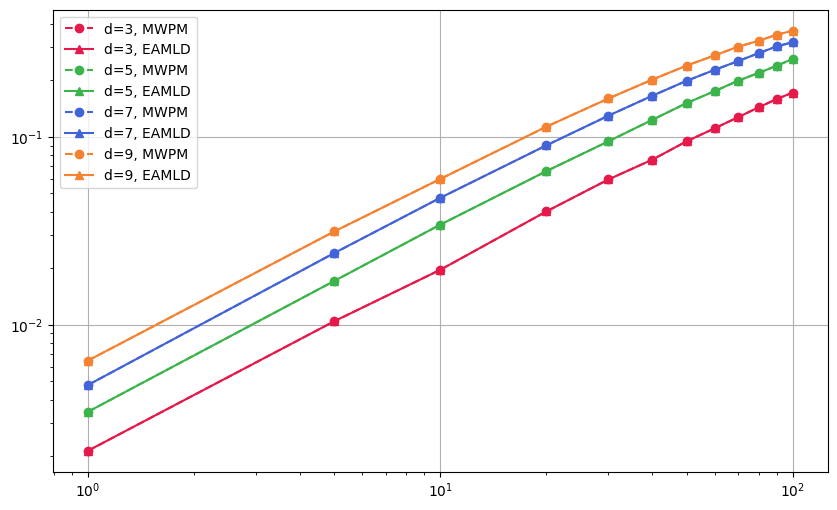

In [6]:
import numpy as np

import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(10, 6))

colors = {
    3: '#E6194B',  # 红
    5: '#3CB44B',  # 绿
    7: '#4363D8',  # 蓝
    9: '#F58231',  # 橙
}


markers = {
    "MWPM": 'o',
    "EAMLD": '^',
}

linestyles = {
    "EAMLD": '-',
    "MWPM": '--',
}

d_list = [3,5,7,9]
# d_list = [3,5,7 ]
decoder_list = ["MWPM", "EAMLD"]

# 遍历不同的码距和解码方法
for d in d_list:
    for decoder_method in decoder_list:
        # 筛选数据
        subset = df_mean[(df_mean['d'] == d) & (df_mean['decoder_method'] == decoder_method)]
        
        # 绘制曲线
        plt.plot(
            # np.log10(subset['probability']), 
            subset['probability'], 
            # np.log10(subset['logical_error_rate']), 
            subset['logical_error_rate'], 
            label = f"d={d}, {decoder_method}",
            color = colors.get(d, '#000000'),  # 默认黑色
            marker = markers.get(decoder_method, 'o'),  # 默认圆形
            linestyle = linestyles.get(decoder_method, '-'),  # 实线
        )

# 添加图例、标题和标签
plt.legend()
# plt.title("逻辑错误率随噪声参数变化")
plt.xscale('log')  # 对x轴进行log处理
plt.yscale('log')  # 对x轴进行log处理

# plt.xlabel("log10")
# plt.ylabel("log10(逻辑错误率)")
plt.grid(True)

# 显示图形
plt.show()

随着噪声参数的变化，逻辑错误率logical_error_rate的变化。
其中噪声参数为横坐标，进行log处理。逻辑错误率为纵坐标，进行log处理。
我们通过颜色区分不同的码距*decoder_method，其中不同的解码方法，使用不同的marker。

### r=1

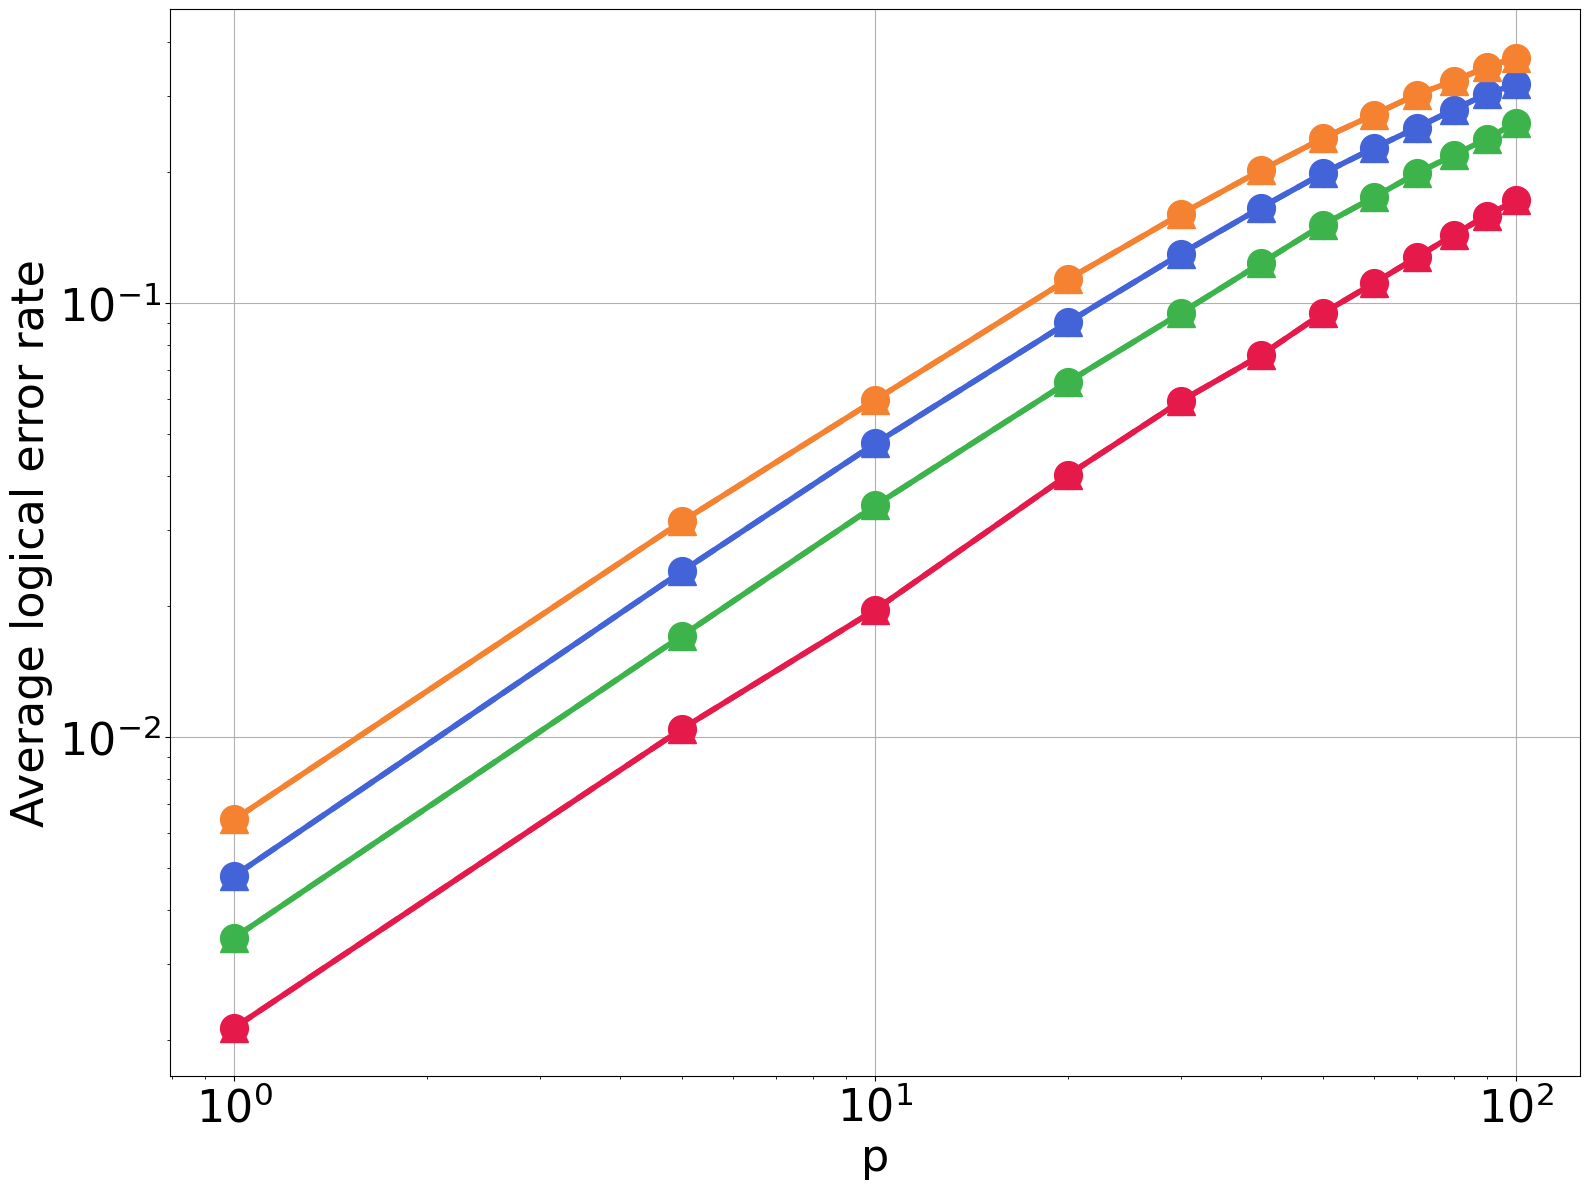

In [11]:
import numpy as np

import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(16, 12))

colors = {
    3: '#E6194B',  # 红
    5: '#3CB44B',  # 绿
    7: '#4363D8',  # 蓝
    9: '#F58231',  # 橙
}


markers = {
    "EAMLD": 'o',
    "MWPM": '^',
}

linestyles = {
    "EAMLD": '-',
    "MWPM": '--',
}


d_list = [3,5,7,9]
# d_list = [3,5,7 ]
decoder_list = ["EAMLD", "MWPM"]

# 遍历不同的码距和解码方法
for d in d_list:
    for decoder_method in decoder_list:
        # 筛选数据
        subset = df_mean[(df_mean['d'] == d) & (df_mean['decoder_method'] == decoder_method)]
        
        # 绘制曲线
        plt.plot(
            # np.log10(subset['probability']), 
            subset['probability'], 
            # np.log10(subset['logical_error_rate']), 
            subset['logical_error_rate'], 
            label = f"d={d}, {decoder_method}",
            color = colors.get(d, '#000000'),  # 默认黑色
            marker = markers.get(decoder_method, 'o'),  # 默认圆形
            linestyle = linestyles.get(decoder_method, '-'),  # 实线
            markersize=20,  # 设置标记大小
            linewidth=4  # 设置线条宽度
            )

# 添加图例、标题和标签
# plt.legend(fontsize=20)  # 设置图例文字大小
# plt.title("r=1, Surface code", fontsize=24)  # 设置标题文字大小
plt.xscale('log')  # 对x轴进行log处理
plt.yscale('log')  # 对y轴进行log处理

plt.xlabel("p", fontsize=32)  # 设置x轴标签文字大小
plt.ylabel("Average logical error rate", fontsize=32)  # 设置y轴标签文字大小

# 设置刻度字体大小
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.grid(True)

# 显示图形
# plt.show()

# ... existing code ...
plt.tight_layout()
# 在plt.show()之前添加保存PDF的代码
plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_surface_code_noisy_varying.pdf", format='pdf', bbox_inches='tight')
# plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_d_surface_code_noisy_varying.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

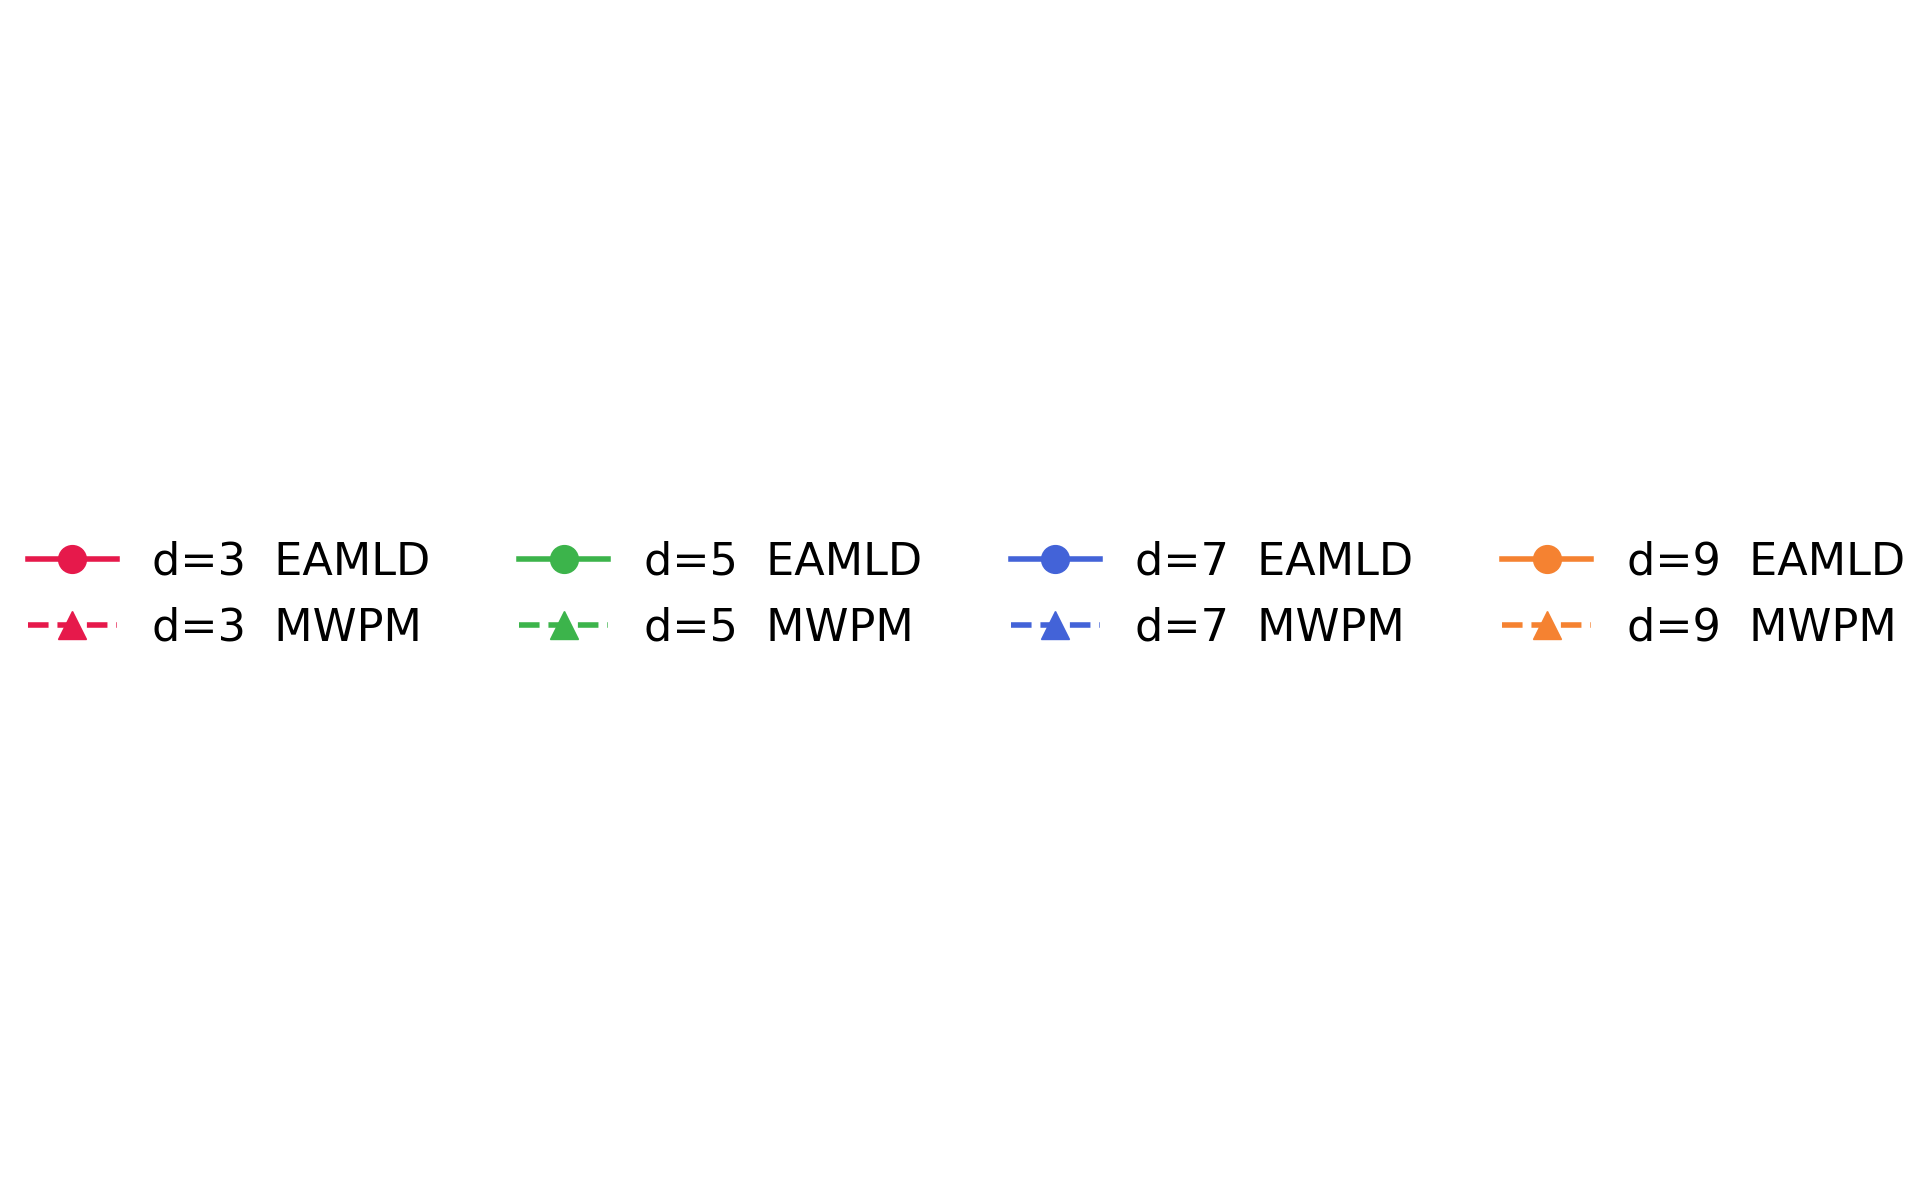

In [12]:
from matplotlib.font_manager import FontProperties

# 创建一个空的图形
fig, ax = plt.subplots(figsize=(16, 12))


# 遍历不同的码距和解码方法，添加图例项
for d in d_list:
    n = d**2 - 1
    for decoder_method in decoder_list:
        # label = f"[[{n},1,{d}]], {decoder_method}"
        label = f"d={d}  {decoder_method}"
        ax.plot([], [], label=label,
                color=colors.get(d, '#000000'),  # 默认黑色
                marker=markers.get(decoder_method, 'o'),
                linestyle=linestyles.get(decoder_method, '-'),
                markersize=20,  # 设置标记大小
                linewidth=4  # 设置线条宽度
                )

# 设置字体属性
font = FontProperties()
font.set_size(32)

# 添加图例并设置字体属性
legend = ax.legend(loc='center', ncol=len(d_list), frameon=False, prop=font)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
# plt.show()

plt.tight_layout()
# 在plt.show()之前添加保存PDF的代码
plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_surface_code_noisy_varying_legend.pdf", format='pdf', bbox_inches='tight')
# plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_d_surface_code_noisy_varying_legend.pdf", format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

### r = d

In [9]:
# import numpy as np

# import matplotlib.pyplot as plt

# # 创建画布
# plt.figure(figsize=(16, 12))

# colors = {
#     3: '#E6194B',  # 红
#     5: '#3CB44B',  # 绿
#     7: '#4363D8',  # 蓝
#     9: '#F58231',  # 橙
# }


# markers = {
#     "EAMLD": 'o',
#     "MWPM": '^',
# }

# linestyles = {
#     "EAMLD": '-',
#     "MWPM": '--',
# }


# d_list = [3,5,7,9]
# # d_list = [3,5,7 ]
# decoder_list = ["EAMLD", "MWPM"]

# # 遍历不同的码距和解码方法
# for d in d_list:
#     for decoder_method in decoder_list:
#         # 筛选数据
#         subset = df_mean[(df_mean['d'] == d) & (df_mean['decoder_method'] == decoder_method)]
        
#         # 绘制曲线
#         plt.plot(
#             # np.log10(subset['probability']), 
#             subset['probability'], 
#             # np.log10(subset['logical_error_rate']), 
#             subset['logical_error_rate'], 
#             label = f"d={d}, {decoder_method}",
#             color = colors.get(d, '#000000'),  # 默认黑色
#             marker = markers.get(decoder_method, 'o'),  # 默认圆形
#             linestyle = linestyles.get(decoder_method, '-'),  # 实线
#             markersize=20,  # 设置标记大小
#             linewidth=4  # 设置线条宽度
#             )

# # 添加图例、标题和标签
# # plt.legend(fontsize=20)  # 设置图例文字大小
# # plt.title("r=d, Surface code", fontsize=24)  # 设置标题文字大小
# plt.xscale('log')  # 对x轴进行log处理
# plt.yscale('log')  # 对y轴进行log处理

# plt.xlabel("p", fontsize=32)  # 设置x轴标签文字大小
# plt.ylabel("Average logical error rate", fontsize=32)  # 设置y轴标签文字大小

# # 设置刻度字体大小
# plt.xticks(fontsize=32)
# plt.yticks(fontsize=32)

# plt.grid(True)
# # ... existing code ...
# plt.tight_layout()
# # 在plt.show()之前添加保存PDF的代码
# # plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_surface_code_noisy_varying.pdf", format='pdf', bbox_inches='tight')
# plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_d_surface_code_noisy_varying.pdf", format='pdf', bbox_inches='tight')

# # 显示图形
# plt.show()

In [10]:
# from matplotlib.font_manager import FontProperties

# # 创建一个空的图形
# fig, ax = plt.subplots(figsize=(16, 12))


# # 遍历不同的码距和解码方法，添加图例项
# for d in d_list:
#     n = d**2 - 1
#     for decoder_method in decoder_list:
#         # label = f"[[{n},1,{d}]], {decoder_method}"
#         label = f"d={d}  {decoder_method}"
#         ax.plot([], [], label=label,
#                 color=colors.get(d, '#000000'),  # 默认黑色
#                 marker=markers.get(decoder_method, 'o'),
#                 linestyle=linestyles.get(decoder_method, '-'),
#                 markersize=20,  # 设置标记大小
#                 linewidth=4  # 设置线条宽度
#                 )

# # 设置字体属性
# font = FontProperties()
# font.set_size(32)

# # 添加图例并设置字体属性
# legend = ax.legend(loc='center', ncol=len(d_list), frameon=False, prop=font)

# # 隐藏坐标轴
# ax.axis('off')

# # 显示图形
# # plt.show()

# plt.tight_layout()
# # 在plt.show()之前添加保存PDF的代码
# # plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_1_surface_code_noisy_varying_legend.pdf", format='pdf', bbox_inches='tight')
# plt.savefig("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/noisy_varying_result/r_d_surface_code_noisy_varying_legend.pdf", format='pdf', bbox_inches='tight')

# # 显示图形
# plt.show()

研究，为什么当d=9，噪声参数为30的情况下，EAMLD的方法无法收敛。